## Observations and Insights 

Conclusions

1.- The gender distrubuiton in the the mice population was balanced, almost the same number of males and female mice, there isn't any indicator that the gender plays an important role in the effectiveness of any of the drug regimens. 

2.- Based on the data provided with can see that mice Capomulin have proven to have the highest survival rate compare to the other drug regimens used in the study. Ramicane has the lowest tumor volume median followed by Capomulin.

3.- The correlation between body weight and average tumor volume among mice treated with Capomulin shows that tumor volume is directly related to the weight of a the trated mice.

4.- Mice treated with Capomulin presented a clear improvement in the tumor volume by the end of the study. Out of all the drug regimens Capomulin showed second best results right after Ramicane regimen.

5.- Infubinol Proved to be the least efficient drug as a treatment to treat the tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMiceData = merged_df[merged_df.duplicated(['Mouse ID',"Timepoint"])]
duplicateMiceData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = merged_df[merged_df["Mouse ID"].isin(['g989'])]
duplicateMiceData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df = merged_df.loc[merged_df["Mouse ID"] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
Cleaned_df['Mouse ID'].nunique()

248

In [7]:
# Number of rows has decreased too, because we dropped the duplicate mouse
Cleaned_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drugs = Cleaned_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Calculating Mean Volume
mean_volume = grouped_by_drugs['Tumor Volume (mm3)'].mean()
# Calculating Median
median_volume = grouped_by_drugs['Tumor Volume (mm3)'].median()
# Calculating Variance
variance_volume = grouped_by_drugs['Tumor Volume (mm3)'].var()
# Calculating Standard Deviation
std = grouped_by_drugs['Tumor Volume (mm3)'].std()
# Calculating SEM
sem = grouped_by_drugs['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
volume_stats_by_drug = pd.DataFrame({"Mean":mean_volume,
                                    "Median":median_volume,
                                    "Variance":variance_volume,
                                    "Standard Deviation":std,
                                    "Standard Error of the Mean":sem
                                    })
#summary DataFrame
volume_stats_by_drug


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# using the groupby object we will use the Aggregation method
volume_stats = {"Tumor Volume (mm3)":["mean","median","var","std","sem"]}
summarry_table = grouped_by_drugs.agg(volume_stats)
summarry_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

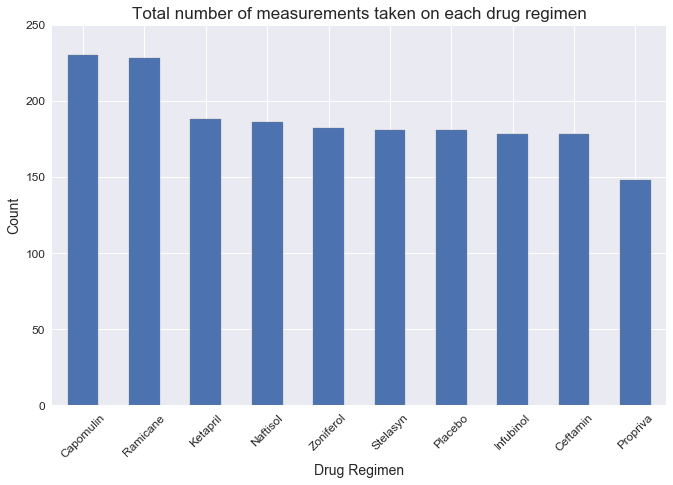

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_counts = Cleaned_df['Drug Regimen'].value_counts()
chart1 = total_counts.plot.bar(rot=45,figsize=(11,7),fontsize=12, edgecolor='gray');

# Formatting Text and limits
chart1.set_title("Total number of measurements taken on each drug regimen", fontsize=17)
chart1.set_ylabel("Count",fontsize=14)
chart1.set_xlabel("Drug Regimen",fontsize=14)
chart1.set_ylim(0,250);
# style




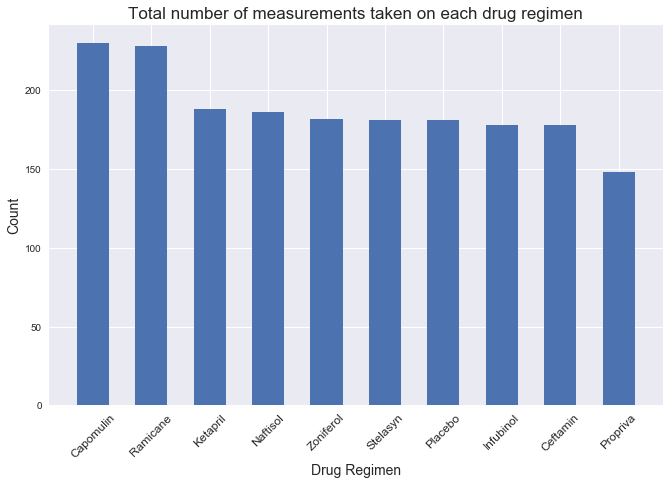

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = Cleaned_df['Drug Regimen'].value_counts().index
counts = list(Cleaned_df['Drug Regimen'].value_counts())

plt.figure(figsize=(11,7));
plt.style.use('seaborn')
plt.xticks(rotation=45, fontsize=12)
plt.bar(drugs,counts,width=0.55)

# setting labels
plt.title("Total number of measurements taken on each drug regimen", fontsize=17)
plt.xlabel("Drug Regimen",fontsize=14)
plt.ylabel("Count",fontsize=14);


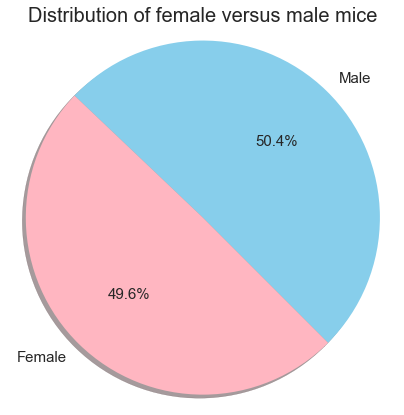

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdf = Cleaned_df.drop_duplicates(subset='Mouse ID', keep='first')['Sex'].value_counts()

piechart1 = genderdf.plot.pie(startangle=-45, autopct="%1.1f%%", figsize=(7,7), fontsize=15,
                             colors=['skyblue','lightpink'], shadow=True);
piechart1.set_ylabel("")
piechart1.axis("equal")
piechart1.set_title("Distribution of female versus male mice", fontsize=20);

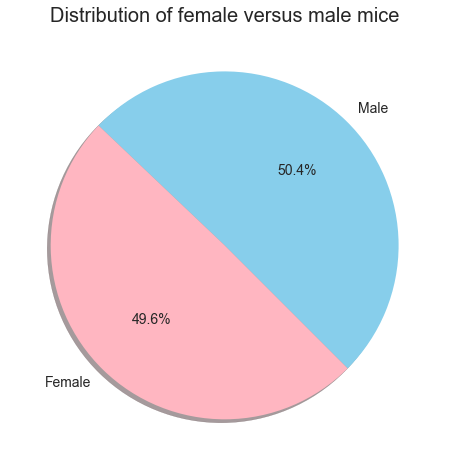

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = genderdf.index  # getting the 2 genders and store them in a list
gender_count = genderdf.values

textprops = {"fontsize":14}

plt.figure(figsize=(8,8))
plt.title("Distribution of female versus male mice", fontsize=20)
plt.pie(gender_count, labels=genders, startangle=-45, autopct="%1.1f%%",
                             colors=['skyblue','lightpink'], shadow=True, textprops=textprops);



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_volume = Cleaned_df.drop_duplicates(subset='Mouse ID', keep='last')
final_volume = final_volume[['Mouse ID','Timepoint']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_last_timepoint = pd.merge(final_volume, Cleaned_df, how='left', on=['Mouse ID','Timepoint'])
final_volume_last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    tumor_vol = final_volume_last_timepoint.loc[final_volume_last_timepoint['Drug Regimen'].isin([regimen])]['Tumor Volume (mm3)']
#     print(tumor_vol['Tumor Volume (mm3)'])    
    
    # add subset 
    tumors_vols.append(tumor_vol)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile(q=[0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upper_quartile-lower_quartile
    lower_boundary = lower_quartile - (1.5 * iqr)
    upper_boundary = upper_quartile + (1.5 * iqr)
    print("┌-------------------------------------------------------------------┐")
    print(f"|\t\t\tPotential Outliers for {regimen} ")
    print(f"| The lower quartile of the final tumor volumes is {lower_quartile:.3f}")
    print(f"| The median of the final tumor volumes is {median:.3f}")
    print(f"| The upper quartile of the final tumor volumes is {upper_quartile:.3f}")
    print(f"| The Inner quartile is {iqr:.3f}\n|\n|")
    print(f"| Values located below {lower_boundary:.3f} could be considered outliers")
    print(f"| Values located above {upper_boundary:.3f} could be considered outliers")
    print("└-------------------------------------------------------------------┘\n")
    

┌-------------------------------------------------------------------┐
|			Potential Outliers for Capomulin 
| The lower quartile of the final tumor volumes is 32.377
| The median of the final tumor volumes is 38.125
| The upper quartile of the final tumor volumes is 40.159
| The Inner quartile is 7.782
|
|
| Values located below 20.705 could be considered outliers
| Values located above 51.832 could be considered outliers
└-------------------------------------------------------------------┘

┌-------------------------------------------------------------------┐
|			Potential Outliers for Ramicane 
| The lower quartile of the final tumor volumes is 31.560
| The median of the final tumor volumes is 36.562
| The upper quartile of the final tumor volumes is 40.659
| The Inner quartile is 9.099
|
|
| Values located below 17.913 could be considered outliers
| Values located above 54.307 could be considered outliers
└-------------------------------------------------------------------┘

┌------

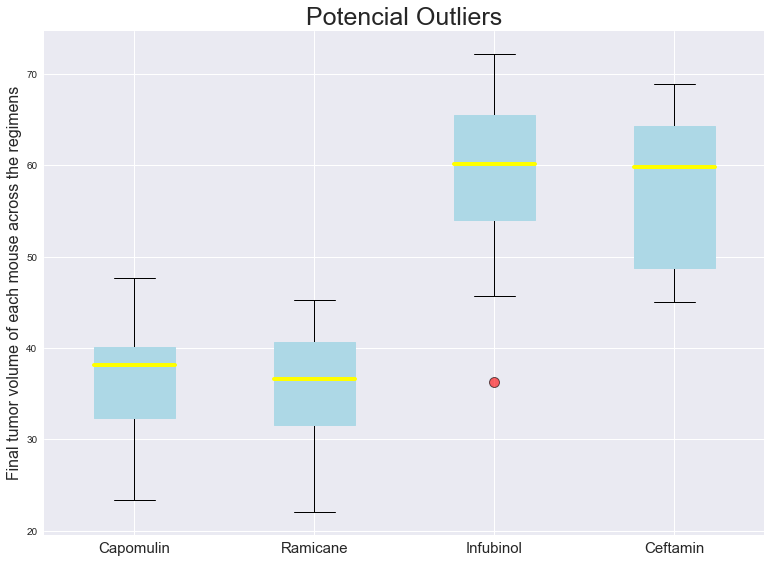

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using "tumors_vols" list, previously poupulated

fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(tumors_vols, patch_artist=True) 

# Setting title and labels
plt.xticks([1, 2, 3, 4], regimens, fontsize=15)
plt.ylabel("Final tumor volume of each mouse across the regimens", fontsize=16)

############################################################
#                       Formatting style                   #
############################################################

# Applying seaborn style
plt.style.use('seaborn')
# Change color and linewidth of the medians:
for median in bp['medians']:
    median.set(color='yellow', linewidth=4)

# Changing the Fliers:
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='red', alpha=0.6)
    
# Changing fill color of boxes:
for box in bp['boxes']:
    box.set(color='lightblue')

# 
plt.title("Potencial Outliers", fontsize=25)

plt.show()


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = Cleaned_df.loc[Cleaned_df['Drug Regimen'].isin(["Capomulin"])]
# Randomly picking a mouse
random_mouse = Capomulin_df.sample()['Mouse ID']
mouse_data = Capomulin_df.loc[Capomulin_df["Mouse ID"].isin(random_mouse)]
mouse_data = mouse_data[["Timepoint","Tumor Volume (mm3)"]]

(-2, 47)

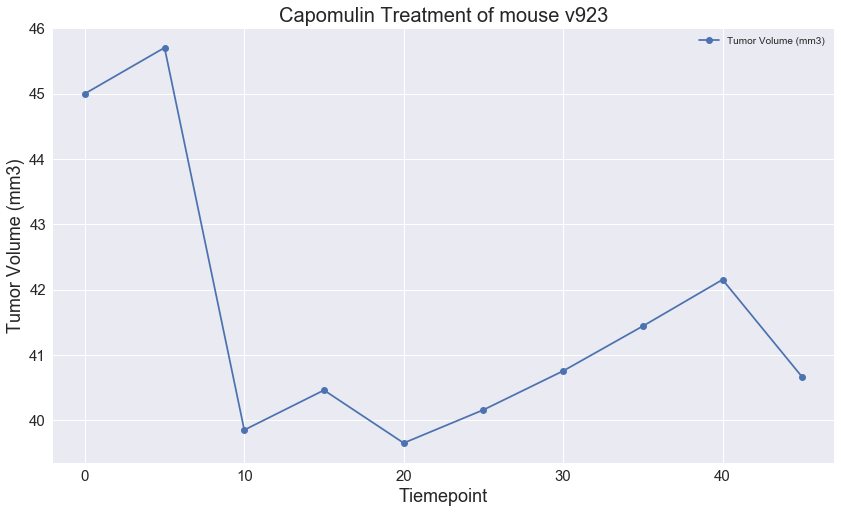

In [18]:
line_chart =mouse_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)', figsize=(14,8),fontsize=15, marker='o')
line_chart.set_xlabel("Tiemepoint", fontsize=18)
line_chart.set_ylabel("Tumor Volume (mm3)", fontsize=18)
line_chart.set_title(f"Capomulin Treatment of mouse {random_mouse.values[0]}", fontsize=20)
line_chart.set_xlim(min(mouse_data['Timepoint'])-2,max(mouse_data['Timepoint'])+2)

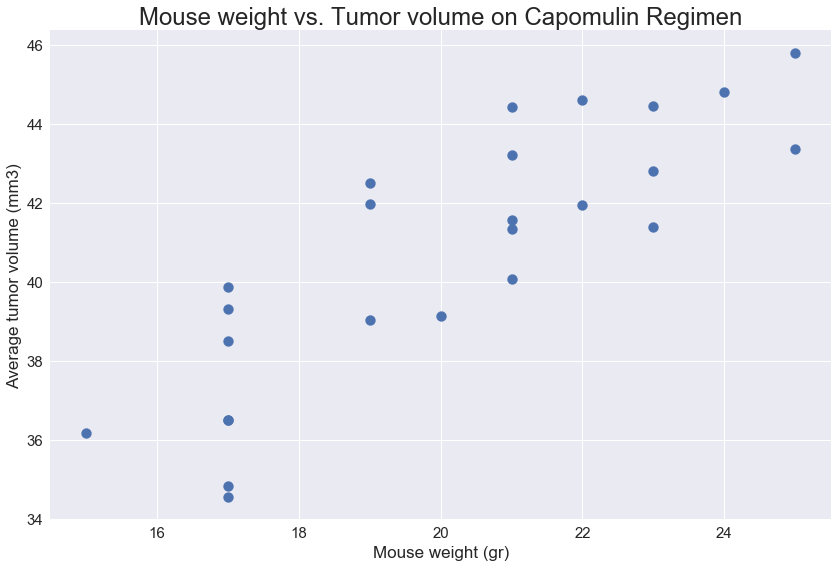

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_values_df = Capomulin_df.groupby("Mouse ID").mean()

plt.figure(figsize=(14,9))
plt.title("Mouse weight vs. Tumor volume on Capomulin Regimen", fontsize=24)
plt.scatter(avg_values_df["Weight (g)"],avg_values_df["Tumor Volume (mm3)"], s = 100)
plt.xlabel("Mouse weight (gr)", fontsize=17)
plt.ylabel("Average tumor volume (mm3)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation
correlation = st.pearsonr(avg_values_df["Weight (g)"],avg_values_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


The r-squared value is: 0.7088568047708717


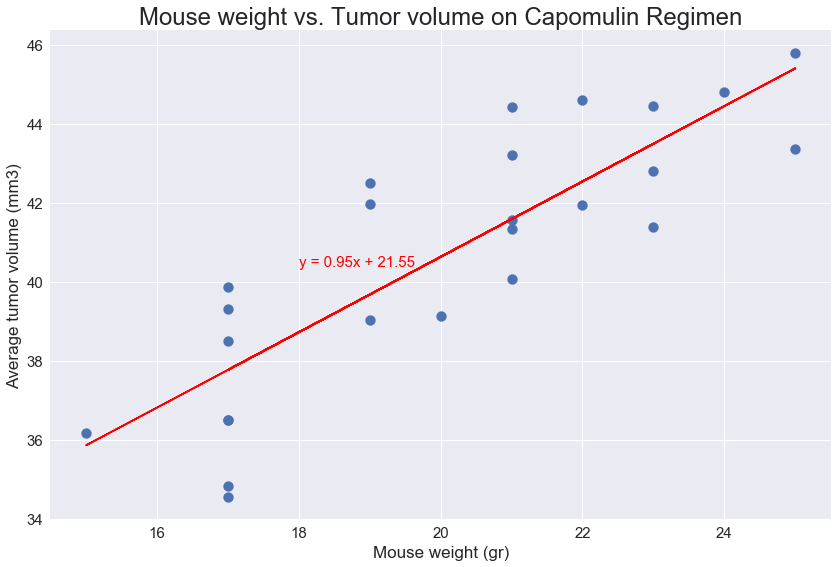

In [21]:
# Linear Regresion model
x = avg_values_df["Weight (g)"]
y = avg_values_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,9))
plt.title("Mouse weight vs. Tumor volume on Capomulin Regimen", fontsize=24, )
plt.scatter(x,y, s=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,40.4),fontsize=15,color="red")
plt.xlabel("Mouse weight (gr)", fontsize=17)
plt.ylabel("Average tumor volume (mm3)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
print(f"The r-squared value is: {rvalue**2}")

